<a href="https://colab.research.google.com/github/GeovaniRA/Proyecto_Final/blob/main/Sinergy_Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<h1 style="color:#86A8E7"> Caso: Synergy Logistics </h1>

## Carga de base de datos

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Santander_Alta_Empleabilidad/bin')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Santander_Alta_Empleabilidad/bin'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
datos = pd.read_csv('synergy_logistics_database.csv', sep=',')
datos.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [ ]:
datos.tail()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
19051,19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000
19055,19056,Imports,Malaysia,Singapore,2020,01/07/20,Gas turbines,Sea,Union Energy Co,30000000


In [ ]:
#Al parecer no hay valores faltantes en el dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19056 entries, 0 to 19055
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   register_id     19056 non-null  int64 
 1   direction       19056 non-null  object
 2   origin          19056 non-null  object
 3   destination     19056 non-null  object
 4   year            19056 non-null  int64 
 5   date            19056 non-null  object
 6   product         19056 non-null  object
 7   transport_mode  19056 non-null  object
 8   company_name    19056 non-null  object
 9   total_value     19056 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


# Rutas mas demandadas

                     ruta
South Korea-Vietnam   497
Netherlands-Belgium   437
USA-Netherlands       436
Japan-Mexico          385
China-Mexico          351
China-Japan           343
Germany-China         328
Japan-Brazil          306
Germany-France        299
South Korea-Japan     294


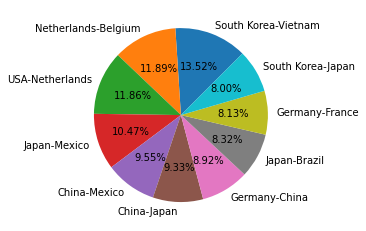

In [ ]:
#Agregamos una nueva columna que contendra la ruta
datos['ruta'] = datos.origin + '-' + datos.destination
rutas = pd.DataFrame(datos.ruta.value_counts().sort_values(ascending = False)[:10])
print(rutas)
#Estas serian las 10 rutas mas demandadas
plt.pie(rutas.ruta, labels=rutas.index, startangle=45, autopct='%1.2f%%')
plt.show()

# Uso de medios de transporte

In [ ]:
# Formacion de agrupaciones
filtro = datos.groupby(['direction', 'transport_mode'])
print(filtro['total_value'].sum())
print(filtro['total_value'].count())

direction  transport_mode
Exports    Air               32785147000
           Rail              34505043000
           Road              27280486000
           Sea               65592622000
Imports    Air                5477000000
           Rail               9123000000
           Road               5990000000
           Sea               34938000000
Name: total_value, dtype: int64
direction  transport_mode
Exports    Air               2045
           Rail              2780
           Road              2149
           Sea               8434
Imports    Air                344
           Rail               601
           Road               449
           Sea               2254
Name: total_value, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

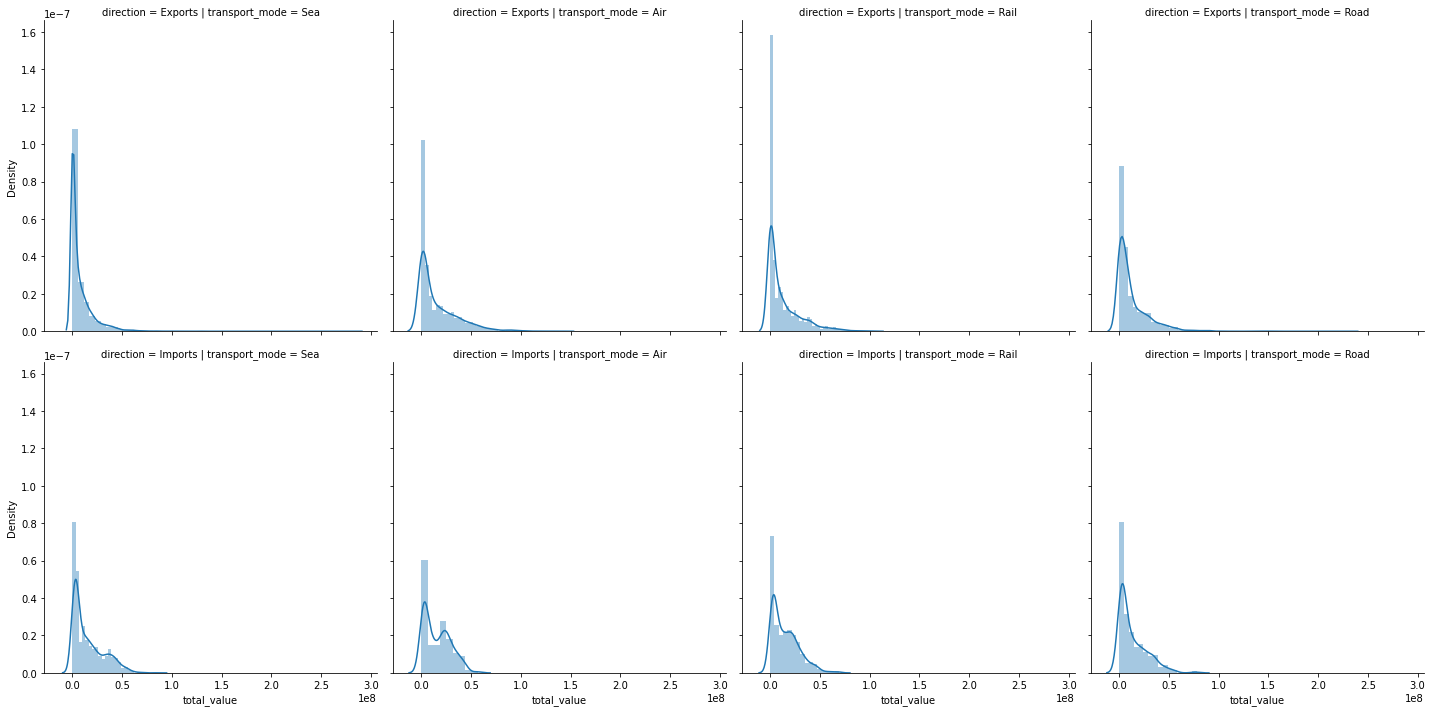

'\n- IMPORTACIONES:\n  El medio de transporte menos importante por valor es "AIR"\n\n- EXPORTACIONES:\n  El medio de transporte menos importante por valor es "ROAD"\n'

In [ ]:
g = sns.FacetGrid(data=datos, col= 'transport_mode', row = 'direction',
                  aspect=1, height=5)
g.map(sns.distplot, 'total_value')
plt.savefig('IMAGEN_1')
plt.show()

# Dado los graficos y datos arrojado de las agrupaciones obtenemos lo siguiente
'''
- IMPORTACIONES:
  El medio de transporte menos importante por valor es "AIR"

- EXPORTACIONES:
  El medio de transporte menos importante por valor es "ROAD"
'''
# Que serian los modos de transporte a reducir 

# Porcentaje - valor generado por pais

In [ ]:
#Observemos que paises a travez de la rutas concentran el 80% del valor
datos['ruta'] = datos.origin + '-' + datos.destination
auxiliar = datos.groupby('ruta')
auxiliar_2 = pd.DataFrame(auxiliar.total_value.sum())
auxiliar_2['ponderaciones'] = (auxiliar_2.total_value / auxiliar_2.total_value.sum())*100
new_rutas = auxiliar_2.sort_values('ponderaciones', ascending=False)[:55].ponderaciones.sum()
print(f'Las primeras 55 rutas mas concurridas concentran el: {new_rutas}% del valor.')

Las primeras 55 rutas mas concurridas concentran el: 80.07371581583232% del valor.


In [ ]:
#Top 10 ...
a_rutas = auxiliar_2.sort_values('ponderaciones', ascending=False)[:55].ponderaciones
print(a_rutas[:10])

ruta
China-Mexico             5.792538
Canada-Mexico            3.917636
South Korea-Vietnam      3.188356
China-Japan              2.731218
Japan-Mexico             2.702473
France-Belgium           2.567590
France-United Kingdom    2.516096
China-South Korea        2.220766
South Korea-Japan        2.198049
USA-Mexico               2.183676
Name: ponderaciones, dtype: float64


In [ ]:
# Separemos los paises
conjunto_1 = []
conjunto_2 = []
for i in a_rutas.index:
  aux = i.split(sep='-')
  conjunto_1.append(aux[0])
  conjunto_2.append(aux[1])

paises = set(conjunto_1 + conjunto_2)

print(f'*** Los paises que concentran el {new_rutas} del valor son: ***')
for i in paises:
  print(i)

*** Los paises que concentran el 80.07371581583232 del valor son: ***
Belorussia
Belgium
Germany
United Arab Emirates
France
Singapore
China
United Kingdom
Canada
Russia
Vietnam
Argentina
Mexico
Brazil
Spain
Japan
South Korea
USA
Turkey
India
Malaysia
Italy
Thailand
Netherlands
